<a href="https://colab.research.google.com/github/SagarNadig30/Confusion-Matrix/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Step 1: Unzip your dataset
import zipfile, os

zip_path = "leapGestRecog.zip.zip"
extract_dir = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: dataset


In [23]:
# Step 2: Build ImageDataGenerators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_dir = os.path.join(extract_dir, "train")
test_dir = os.path.join(extract_dir, "test")

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes
print("Classes:", train_gen.class_indices)


Found 14400 images belonging to 1 classes.
Found 3600 images belonging to 1 classes.
Found 6000 images belonging to 1 classes.
Classes: {'train': 0}


Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 114s 198ms/step - accuracy: 0.8942 - loss: 0.3873 - val_accuracy: 0.9940 - val_loss: 0.0129
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 108s 191ms/step - accuracy: 0.9974 - loss: 0.0081 - val_accuracy: 0.9997 - val_loss: 0.0018
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 106s 188ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9998 - val_loss: 0.0021
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 108s 193ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9998 - val_loss: 0.0018
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 106s 189ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 106s 189ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9998 - val_loss: 0.0023
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 110s 196ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 108s 191ms/step - accuracy: 0.9991 - loss: 0.00

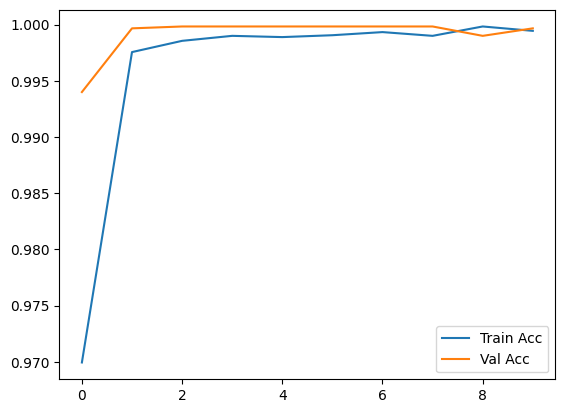

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


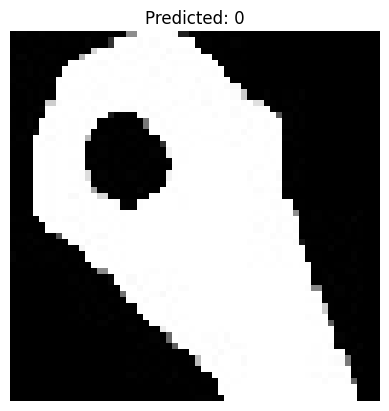

Predicted class: 0


In [44]:
# Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array # Corrected import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 2: Dataset Paths
img_size = (64, 64)   # you can increase to (128,128) for more accuracy
train_dir = "dataset/train"
test_dir = "dataset/test"

# Step 3: Data Generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(20, activation="softmax")   # 20 gesture classes
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 5: Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10   # increase epochs for better accuracy
)

# Plot training history
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()

# Step 6: Prediction Function
def predict_image(img_path):
    img = load_img(img_path, target_size=img_size, color_mode="grayscale")  # Use load_img
    x = img_to_array(img) / 255.0 # Use img_to_array
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    class_idx = np.argmax(preds)
    class_label = list(train_gen.class_indices.keys())[class_idx]

    # Show image + prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

    print(f"Predicted class: {class_label}")

# Example: predict first image from class "0"
sample_img = os.path.join(test_dir, "0", os.listdir(os.path.join(test_dir, "0"))[0])
predict_image(sample_img)